# Especialização em Ciência de Dados - PUC-Rio
# Machine Learning
## Exercício 1: Análise Exploratória e Pré-processamento de Dados



---


<b>Aluno: José Douglas Oliveira do Nascimento </b>

---



<b>Escolha um dataset simples (preferencialmente do UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/index.php) e treine a análise exploratória e o pré-processamento de dados com os comandos aprendidos em aula.</b>

## Definição do Problema

### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

### Informação sobre os atributos:

Listing of attributes:

>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Fonte de Dados: http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

## Pacotes Necessários:


In [4]:
# Load CSV using Pandas from URL
import pandas as pd

import numpy as np
# import statsmodels as sm
# import sklearn as skl
# import sklearn.preprocessing as preprocessing
# import sklearn.linear_model as linear_model
# import sklearn.cross_validation as cross_validation
# import sklearn.metrics as metrics
# import sklearn.tree as tree
import seaborn as sns
import matplotlib.pyplot as plt

## Carga do Dataset
Utilizei algumas rotinas para importar da fonte, descompactar e deixar carregado no DataFrame.
Por segurança, fiz download, caso aja bloqueio de download por ftp, etc.

In [5]:
# testes
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
dados = pd.read_csv(url)
dados.head(10)



,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [6]:

# Obs.: O arquivo adult.data não tem nome das colunas. Então criei a lista das colunas para usar como parametro do read_html
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

colunas=['Age', 
         'Workclass', 
         'fnlwgt', 
         'Education', 
         'Education-Num', 
         'Martial Status',
         'Occupation', 
         'Relationship', 
         'Race', 
         'Sex', 
         'Capital Gain', 
         'Capital Loss',
         'Hours per week', 
         'Country', 
         'Target'
        ]

dados = pd.read_csv(url, names=colunas)
# print(data.shape())
# count_row = df.shape[0]  # gives number of row count
# count_col = df.shape[1]  # gives number of col count
# ou: r, c = df.shape
instancia, atributo = dados.shape
print(f'Quantidade de instancias: {instancia}')
print(f'Quantidade de atributos: {atributo}')
dados.head()

Quantidade de instancias: 32561
Quantidade de atributos: 15


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Análise Exploratória

### Informações Gerais e Estatística Descritiva

In [7]:
dados.tail(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
# É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           32561 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
dados.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 <=50K    24720
 >50K      7841
Name: Target, dtype: int64


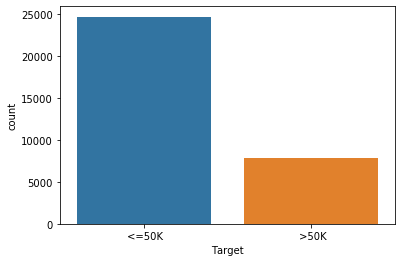

In [10]:
# Estatística básica na variável Target
print(dados.Target.value_counts())
sns.countplot(x='Target', data=dados)
plt.show()

In [11]:
#substituir valores missing ('?') em uma variavel null com o uso de numpy
dados = dados.replace('?', np.NaN)

In [12]:
# Contar quantas variáveis são missing
dados.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

In [13]:
# Correlação de Pearson
dados.corr(method = 'pearson')
# Outros métodos de correlação: {‘pearson’, ‘kendall’, ‘spearman’}

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours per week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [14]:
# Simetria de cada atributo
dados.skew()

Age                0.558743
fnlwgt             1.446980
Education-Num     -0.311676
Capital Gain      11.953848
Capital Loss       4.594629
Hours per week     0.227643
dtype: float64

### Visualização com Matplotlib

In [17]:
# Importa o pacote matplotlib
import matplotlib.pyplot as plt
# Indica que os dataset serão gerados nesta mesma janela
%matplotlib inline

#### Histograma do dataset:atributos Education-Num possuem uma distribuição aproximadamente Normal.

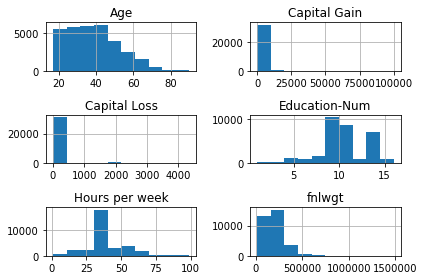

<Figure size 2880x2160 with 0 Axes>

In [31]:
# Histograma
dados.hist()
# plt.figure(figsize=(40,30))
plt.tight_layout()
plt.show()

#### Gráfico de densidade: Vemos que a idade também possui distribuição normal

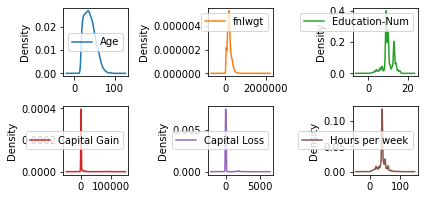

In [33]:
dados.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.tight_layout()
plt.show()

### Visualização com Seaborn (pacote menos complexo, mas gráficos menos flexíveis)

"""
Split the data into a training and a testing set
"""
train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]
###########################################################################################################
##########################################################################################################
"""
Train the model
"""
tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)
###########################################################################################################
##########################################################################################################
"""
Predict the classes of new, unseen data
"""
prediction = tree.predict(test_features)
###########################################################################################################
##########################################################################################################
"""
Check the accuracy
"""
print("The prediction accuracy is: ",tree.score(test_features,test_targets)*100,"%")

**Agora pesquise outras operações ou comandos (não estudados em sala) e realize outros tipos de técnicas de análise exploratória e pré-processamento de dados.**

**O que você aprendeu sobre este dataset?**